#### Veri Kümesi Bilgileri:

#### Ecotect'te simüle edilen 12 farklı bina şeklini kullanarak enerji analizi yapıyoruz. Binalar, diğer parametrelerin yanı sıra cam alanı, cam alanı dağılımı ve yönelim açısından farklılık gösterir. 768 yapı şekli elde etmek için çeşitli ayarları yukarıda belirtilen özelliklerin işlevleri olarak simüle ediyoruz. Veri seti, iki gerçek değerli yanıtı tahmin etmeyi amaçlayan 768 örnek ve 8 özellik içerir. Yanıt en yakın tam sayıya yuvarlanırsa, çok sınıflı bir sınıflandırma problemi olarak da kullanılabilir.

#### Özellik Bilgileri:

#### Veri kümesi sekiz öznitelik (veya X1…X8 ile gösterilen özellikler) ve iki yanıt (veya y1 ve y2 ile gösterilen sonuçlar) içerir. Amaç, iki yanıtın her birini tahmin etmek için sekiz özelliği kullanmaktır.

#### özellikle:
#### X1 Göreceli Kompaktlık
#### X2 Yüzey Alanı
#### X3 Duvar Alanı
#### X4 Çatı Alanı
#### X5 Genel Yükseklik
#### X6 Oryantasyonu
#### X7 Cam Alanı
#### X8 Cam Alan Dağılımı
#### y1 Isıtma Yükü
#### y2 Soğutma Yükü

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

energy_efficiency = pd.read_csv("ENB2012_data.csv")
df = energy_efficiency.copy()
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [43]:
df.columns = ["Relative Compactness","Surface Area","Wall Area",
                "Roof Area", "Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]

#### Burada değişkenleri tekrar isimlendirme yaptım X ve Y gibi sütun adları proje üzerinden ilerlerken pek destekleyici olmayacaktır. Dolayısıyla veri setindeki isimlendirmeye tabii tuttum.

#### Temel kütüphanelerimizi projemize dahil ediyoruz ve kaggle'dan yüklediğimiz [veri setimizi](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset) okuyoruz. Ardından ilk gözlem için head ile verileri getiriyoruz. 

In [3]:
print(f" Veri setinin boyut sayısı: {df.ndim}\n",
     f"Veri setinin boyut bilgisi: {df.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (768, 10)
 Veri setindeki toplam eleman sayısı: 7680



#### Stabil olarak her veri setine yaptığım bir temel bilgi çekme yapısını uyguluyorum. İşte boyut sayısı, bilgisi ve eleman sayısı vs. diye.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


#### Ardından veri setinin daha detaylı olacak şekilde içine girmek için 'info()' fonksiyonunu kullanıyoruz. Bu bize sütunları, eleman dağılımlarını ve veri tiplerini veriyor. Şöyle baktığım zaman null değer olmadığı aşikar. Fakat aykırı değerlerin olabileceği unutulmamalı. Bunun dışında veri tipi olarak sadece numerical değerler mevcut. Bir kategorisel değer söz konusu değil. Bu da dönüşüm yapılmayacağını gösterir...

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### Temel bazda işlemleri bitirdikten sonra işin daha çok istatistiksel yapısına hakimiyet kurmaya çalışıyorum. Bu yüzden betimsel istatistik (describe().T) uygulayarak veriye dair tüm matematiksel değerlere göz atabiliyorum. Değerler içlerinde bir aykırılık yaşamıyor gibi gözüküyor. Min ve max değerler birbirine yakın, ortalamalar 'amanın' dedirtmiyor. Dolayısıyla güzel bir veri setine denk gelmiş bulunmaktayız. Fakat yine de hem null değerleri gözlemlemek hem de aykırı değerleri gözlemlemek için bir bakış atacağız...

In [6]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

#### Görüldüğü üzere null değer mevcut değil. 

In [7]:
print(f"Relative Compactness değerleri:\n{df['Relative Compactness'].value_counts()}")
print("-" * 20)
print(f"Surface Area değerleri:\n{df['Surface Area'].value_counts()}")
print("-" * 20)
print(f"Wall Area değerleri:\n{df['Wall Area'].value_counts()}")
print("-" * 20)
print(f"Roof Area değerleri:\n{df['Roof Area'].value_counts()}")
print("-" * 20)
print(f"Overall Height değerleri:\n{df['Overall Height'].value_counts()}")
print("-" * 20)
print(f"Orientation değerleri:\n{df['Orientation'].value_counts()}")
print("-" * 20)
print(f"Glazing Area değerleri:\n{df['Glazing Area'].value_counts()}")
print("-" * 20)
print(f"Glazing Area Distribution değerleri:\n{df['Glazing Area Distribution'].value_counts()}")
print("-" * 20)
print(f"Heating Load değerleri:\n{df['Heating Load'].value_counts()}")
print("-" * 20)
print(f"Cooling Load değerleri:\n{df['Cooling Load'].value_counts()}")
print("-" * 20)

Relative Compactness değerleri:
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative Compactness, dtype: int64
--------------------
Surface Area değerleri:
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface Area, dtype: int64
--------------------
Wall Area değerleri:
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall Area, dtype: int64
--------------------
Roof Area değerleri:
220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof Area, dtype: int64
--------------------
Overall Height değerleri:
7.0    384
3.5    384
Name: Overall Height, dtype: int64
--------------------
Orientation değerleri:
2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64
--------------------
Glazing Area değerleri:
0.10    240
0.25    2

#### Aykrı değerleri gözlemlemek için yaptığımız bu printleme işlemindeyse sadece 'value_counts' kullandık. Yani her bir değişkenin içindeki verileri saydırdık ve değerler arası dengeye göz attık. Baktığımız zaman adam akıllı bir aykırılık söz konusu değil. Wall Area ve Roof Area değerlerinde bir miktar dengesizlik söz konusu fakat dudak uçuklatacak kıvamda değiller. Ancak aykırı değerlere yine de ileride uygulama yapacağım.

In [8]:
y_df = df[["Heating Load", "Cooling Load"]]
df.drop(["Heating Load", "Cooling Load"], axis = 1, inplace = True)
x_df = df

In [9]:
y_df.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [10]:
x_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


#### Evet burada temel olarak X ve Y değerlerini birbirinden ayırdım. Üzerlerinde daha iyi mantıksal işlemler yapabilmek için. X değerlerimiz bağımsız değişkenlerimiz olurken Y değişkenleri de bağımlı değişkenlerimiz olsun. Makine modellemesi yaparken işimize yarayacak. Veri seti hikayesinden de gözlemlediğimiz kadarıyla Y değerleri yanıtları oluşturuyor ve X değerleri ile de Y değerleri için tahmin gerçekleştirilecek...

In [11]:
x_desc = x_df.groupby("Relative Compactness")["Surface Area"].describe()
x_desc

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,,,,,,,,
0.62,64.0,808.5,0.0,808.5,808.5,808.5,808.5,808.5
0.64,64.0,784.0,0.0,784.0,784.0,784.0,784.0,784.0
0.66,64.0,759.5,0.0,759.5,759.5,759.5,759.5,759.5
0.69,64.0,735.0,0.0,735.0,735.0,735.0,735.0,735.0
0.71,64.0,710.5,0.0,710.5,710.5,710.5,710.5,710.5
0.74,64.0,686.0,0.0,686.0,686.0,686.0,686.0,686.0
0.76,64.0,661.5,0.0,661.5,661.5,661.5,661.5,661.5
0.79,64.0,637.0,0.0,637.0,637.0,637.0,637.0,637.0
0.82,64.0,612.5,0.0,612.5,612.5,612.5,612.5,612.5


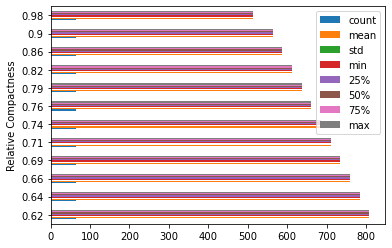

In [12]:
x_desc.plot.barh();

#### Burada temel olarak X değişkenleri arasında bir korelasyon yakalama çabasındayım. X1(Göreceli Kompaktlık) ve X2(Yüzey alanı) değerlerinin karşılıklı describe'larına göz atmaya çalışıyorum ve grafik değerlerinden de baktığımız zaman en tutulabilir X1 verisi '0.62' gibi gözüküyor. Total olarak başarıyı yakalamış gibi. Yani buradan şunu çıkartabiliriz; göreceli kompaktlık azaldıkça yüzey alanı değerlerinde artış yaşanıyor. Kaggle'dan aldığım veri seti bilgilendirmesini en başa yazıyorum...

In [13]:
df_me = x_df.iloc[:, 0:3]
df_me.transform(lambda x: x - x.mean())

,Relative Compactness,Surface Area,Wall Area
0,0.215833,-157.208333,-24.5
1,0.215833,-157.208333,-24.5
2,0.215833,-157.208333,-24.5
3,0.215833,-157.208333,-24.5
4,0.135833,-108.208333,0.0
...,...,...,...
763,-0.124167,112.291667,24.5
764,-0.144167,136.791667,49.0
765,-0.144167,136.791667,49.0
766,-0.144167,136.791667,49.0


In [14]:
x_df.apply(np.mean)

Relative Compactness           0.764167
Surface Area                 671.708333
Wall Area                    318.500000
Roof Area                    176.604167
Overall Height                 5.250000
Orientation                    3.500000
Glazing Area                   0.234375
Glazing Area Distribution      2.812500
dtype: float64

In [15]:
x_df.pivot_table("Relative Compactness", index = "Surface Area", columns = "Orientation")

Orientation,2,3,4,5
Surface Area,,,,
514.5,0.98,0.98,0.98,0.98
563.5,0.90,0.90,0.90,0.90
588.0,0.86,0.86,0.86,0.86
612.5,0.82,0.82,0.82,0.82
637.0,0.79,0.79,0.79,0.79
661.5,0.76,0.76,0.76,0.76
686.0,0.74,0.74,0.74,0.74
710.5,0.71,0.71,0.71,0.71
735.0,0.69,0.69,0.69,0.69


#### Temel bazı uygulamalar ve kullanımlar..

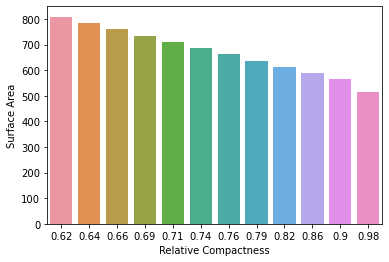

In [16]:
sns.barplot(x = "Relative Compactness", y = "Surface Area", data=x_df);

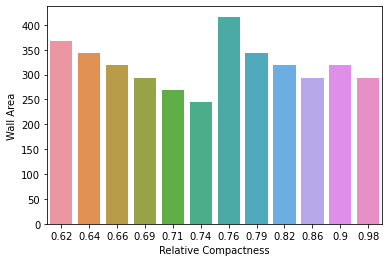

In [17]:
sns.barplot(x = "Relative Compactness", y = "Wall Area", data=x_df);

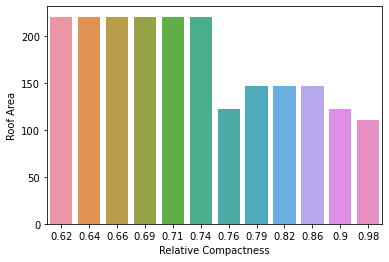

In [18]:
sns.barplot(x = "Relative Compactness", y = "Roof Area", data=x_df);

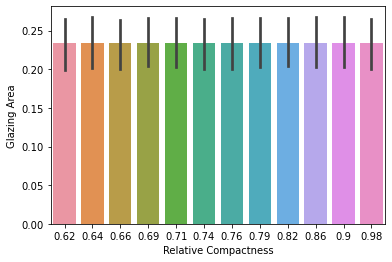

In [19]:
sns.barplot(x = "Relative Compactness", y = "Glazing Area", data=x_df);

#### Burada görece kompaktlık değişkenini baz alarak 'alanlar' üzerinden sorgulama ve grafiklendirme gerçekleştirdim. Kompaktlık, yoğun ve dolgunluk anlamına geliyor. Dolayısıyla yüzey, duvar, çatı ve cam gibi alanların yoğunlukları üzerinden bilgi sahibi olmaya çalıştım.

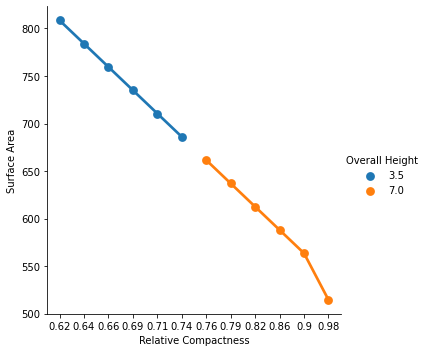

In [20]:
sns.catplot(x = "Relative Compactness", y = "Surface Area", hue = "Overall Height", kind="point", data=x_df);

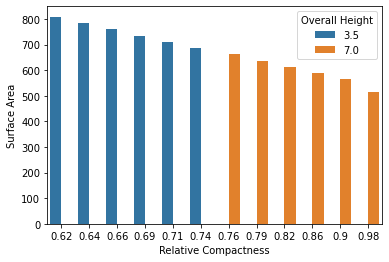

In [21]:
sns.barplot(x = "Relative Compactness", y = "Surface Area", hue = "Overall Height", data=x_df);

#### Şu anda da değişkenler üzerinde çaprazlama gerçekleştiriyorum. Bu değerleri birbiri ile değerlendirecek grafikler bunlar.Yüzey alanını(Surface Area) yükseklik(Overall Height) ve kompaktlık(Relative Compactness) ile sınadığımız bu verilerde genel yükseklik artıkça yoğunluk ve yüzey alanında düşüş saptıyoruz.. Yani genel yükseklik, yüzey alanı için miniumum derecede önemli. Şimdi diğer alanlar için de bunu gözlemleyeceğim.

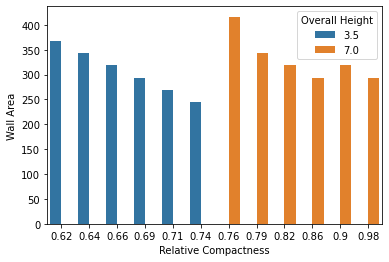

In [22]:
sns.barplot(x = "Relative Compactness", y = "Wall Area", hue = "Overall Height", data=x_df);

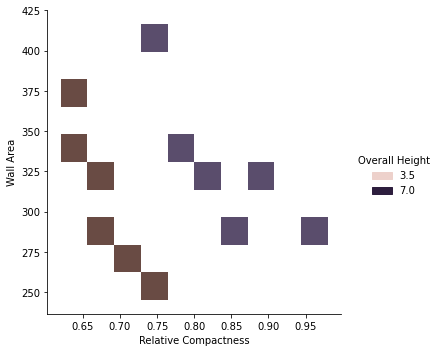

In [23]:
sns.displot(x = "Relative Compactness", y = "Wall Area", hue = "Overall Height", bins=10, data=x_df);

#### Mesela duvar alanı(wall area) için gerçekleştirdiğimiz bu grafik bize genel yükseliğin, duvar alanı için önemli olduğunu gösteriyor. Duvar alanı arttıkça genel yükseklikte artmış.

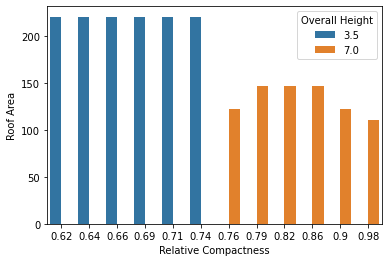

In [24]:
sns.barplot(x = "Relative Compactness", y = "Roof Area", hue = "Overall Height", data=x_df);

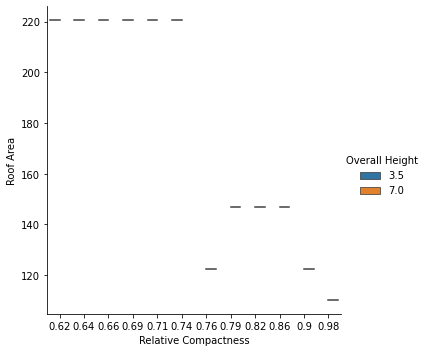

In [26]:
sns.catplot(x = "Relative Compactness", y = "Roof Area", hue = "Overall Height", kind="violin",data=x_df);

#### Yine çatı alanı(roof area) için durumlar yüzey alanı gibi.

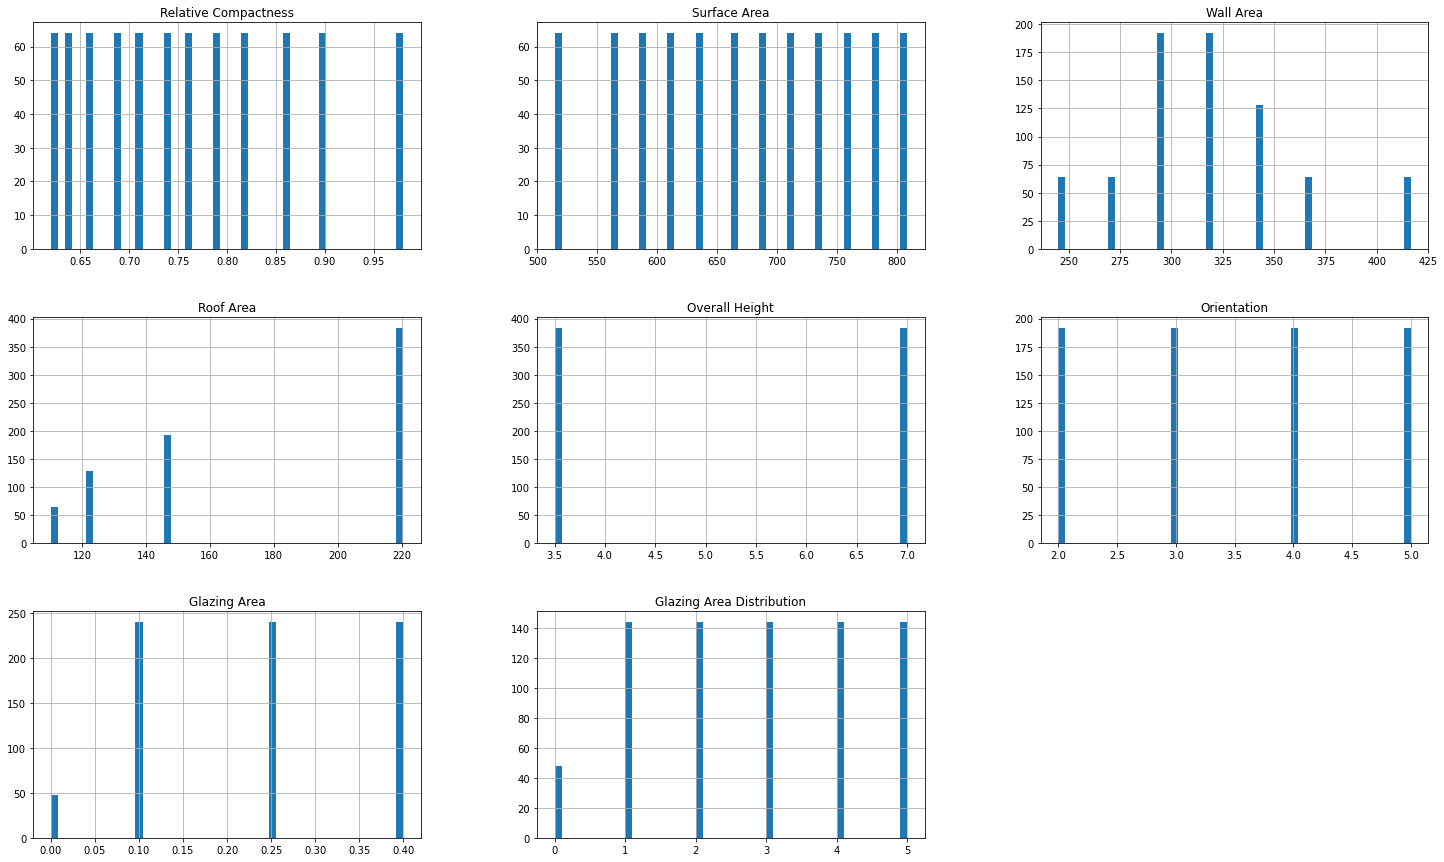

In [27]:
x_df.hist(figsize=(25,15),bins=50);

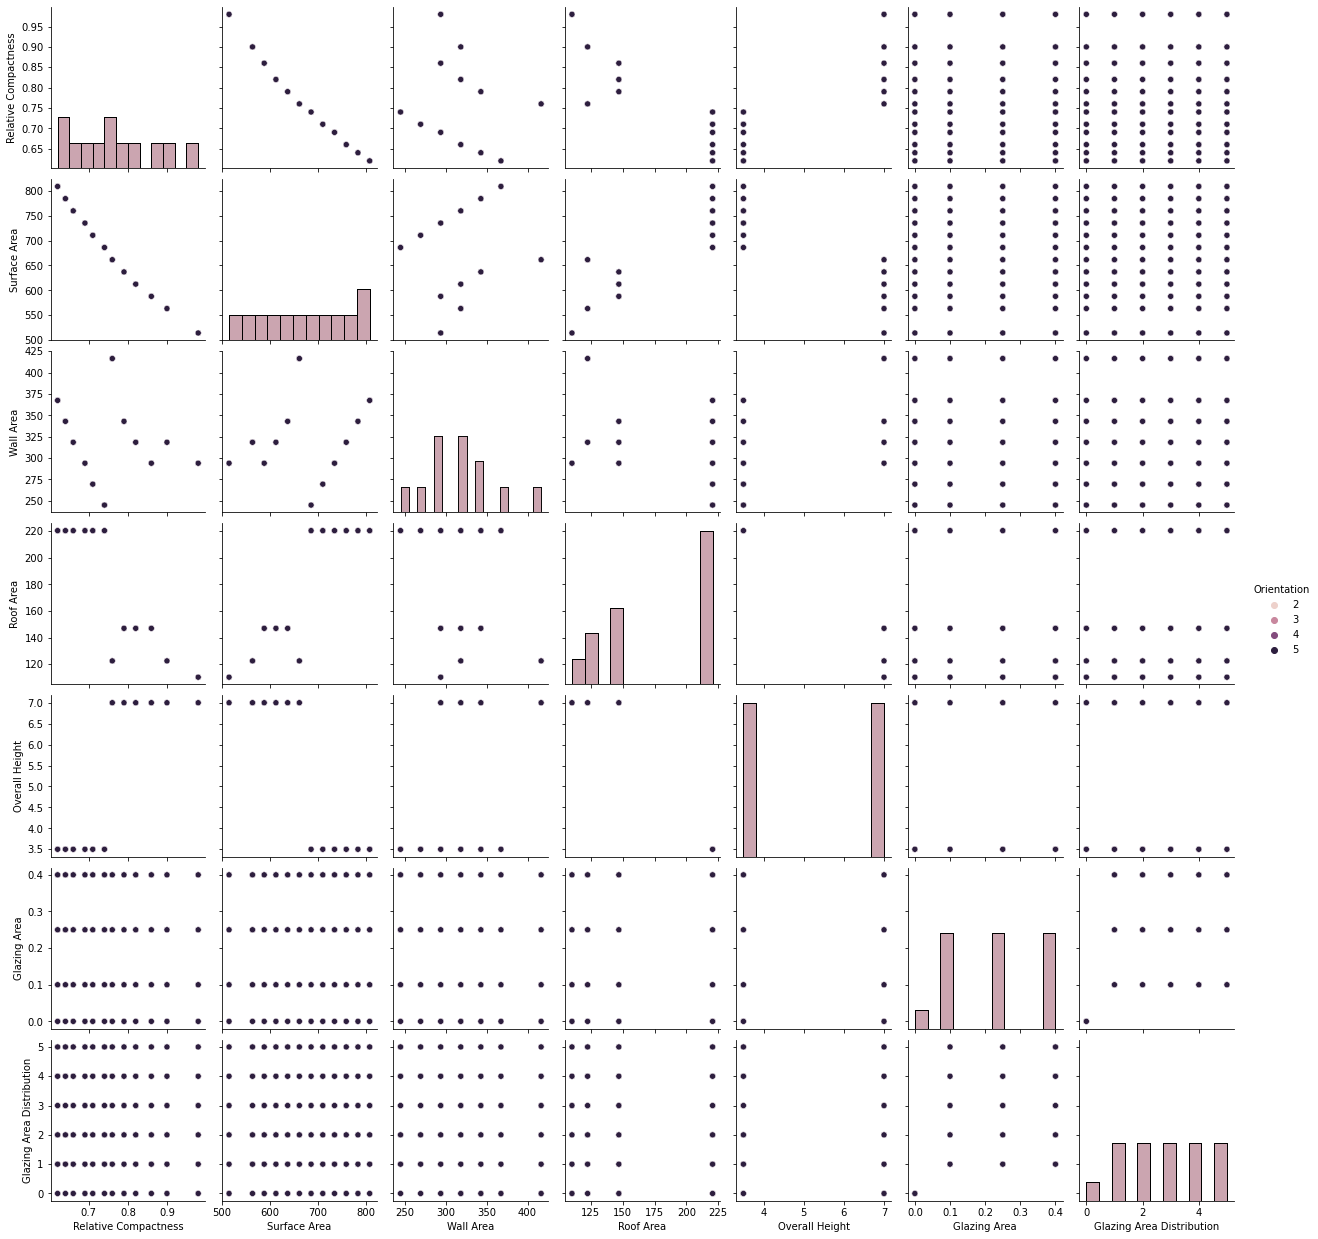

In [28]:
sns.pairplot(x_df, hue="Orientation", diag_kind="hist");

#### Genel grafik eğilimlerimize de göz attıktan sonra görselleştirme aşamasını sonlandırıyorum...

#### Şimdi işin biraz makine modellemesine geçmeden ki istatistiksel yapısını gözlemleyelim. 

In [29]:
import researchpy as rp
rp.summary_cont(x_df[["Relative Compactness","Wall Area", "Overall Height"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Relative Compactness,768.0,0.7642,0.1058,0.0038,0.7567,0.7717
1,Wall Area,768.0,318.5000,43.6265,1.5742,315.4097,321.5903
2,Overall Height,768.0,5.2500,1.7511,0.0632,5.1260,5.3740


In [30]:
rp.summary_cont(x_df)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Relative Compactness,768.0,0.7642,0.1058,0.0038,0.7567,0.7717
1,Surface Area,768.0,671.7083,88.0861,3.1785,665.4687,677.9480
2,Wall Area,768.0,318.5000,43.6265,1.5742,315.4097,321.5903
3,Roof Area,768.0,176.6042,45.1660,1.6298,173.4048,179.8035
4,Overall Height,768.0,5.2500,1.7511,0.0632,5.1260,5.3740
5,Orientation,768.0,3.5000,1.1188,0.0404,3.4208,3.5792
6,Glazing Area,768.0,0.2344,0.1332,0.0048,0.2249,0.2438
7,Glazing Area Distribution,768.0,2.8125,1.5510,0.0560,2.7026,2.9224


#### Researchpy kütüphanesinin summary_cont fonksiyonu ile bir diğer betimsel istatistik yapısını gözlemleme imkanımız olmuştu.  Burada yine gözlem sayısı, ortalama değer ve standart sapma gibi gözlemlediğimiz değerler mevcut. Ancak SE yani standart hata, %95 güven aralığı ve aralık değerlerini gözlemlememizi sağlıyor.

#### Buradaki güven aralığı, ana kütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulma işlemidir. Ayrıyeten güven aralığı, ölçünün hassasiyetinin göstergesidir. Yaptığımız tahminlerin ne kadar güvenilir olduğuna dair bize veri sunar.

In [31]:
x_df[["Relative Compactness","Wall Area", "Overall Height"]].cov()

,Relative Compactness,Wall Area,Overall Height
Relative Compactness,0.011189,-0.940391,0.153325
Wall Area,-0.940391,1903.269883,21.465450
Overall Height,0.153325,21.465450,3.066493


#### Burada kovaryans değerlerini saptadık. Yani değişkenlerin ilişkilerine ilişkin değişkenlik ölçütü elde ediyoruz. Şimdi korelasyona göz atmak istersek;

In [32]:
x_df[["Relative Compactness","Wall Area", "Overall Height"]].corr()

,Relative Compactness,Wall Area,Overall Height
Relative Compactness,1.000000,-0.203782,0.827747
Wall Area,-0.203782,1.000000,0.280976
Overall Height,0.827747,0.280976,1.000000


In [33]:
Q1 = x_df.quantile(0.25)
Q3 = x_df.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 =\n{Q1}\nQ3 =\n{Q3}\nIQR =\n{IQR}")

Q1 =
Relative Compactness           0.6825
Surface Area                 606.3750
Wall Area                    294.0000
Roof Area                    140.8750
Overall Height                 3.5000
Orientation                    2.7500
Glazing Area                   0.1000
Glazing Area Distribution      1.7500
Name: 0.25, dtype: float64
Q3 =
Relative Compactness           0.830
Surface Area                 741.125
Wall Area                    343.000
Roof Area                    220.500
Overall Height                 7.000
Orientation                    4.250
Glazing Area                   0.400
Glazing Area Distribution      4.000
Name: 0.75, dtype: float64
IQR =
Relative Compactness           0.1475
Surface Area                 134.7500
Wall Area                     49.0000
Roof Area                     79.6250
Overall Height                 3.5000
Orientation                    1.5000
Glazing Area                   0.3000
Glazing Area Distribution      2.2500
dtype: float64


In [34]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [35]:
((x_df < alt_sinir) | (x_df > ust_sinir))[350:370]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
350,False,False,False,False,False,False,False,False
351,False,False,False,False,False,False,False,False
352,False,False,False,False,False,False,False,False
353,False,False,False,False,False,False,False,False
354,False,False,False,False,False,False,False,False
355,False,False,False,False,False,False,False,False
356,False,False,False,False,False,False,False,False
357,False,False,False,False,False,False,False,False
358,False,False,False,False,False,False,False,False
359,False,False,False,False,False,False,False,False


In [36]:
aykiri_df = (x_df < alt_sinir) | (x_df > ust_sinir)
x_df[aykiri_df][200:220]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Burada yukarıda söylediğim aykırı değerler ile alakalı yapacağım uygulamayı yaptım. Temel olarak şunları gerçekleştirdim; ilk olarak temel gayem aykırı değerleri saptamaktı. Bunun için 'quantile' değerlerini veri setimizden Q1 ve Q3 için hesaplıyoruz. Quantile değerlerini 0.25 ile 0.75 arasında alıyoruz. Ardından eşik değerlerin sınuçlarını buluyoruz ve bu değerler vasıtasıyla alt_sınır ve üst_sınır değerlerini formülize ederek elde ediyoruz. Son olarakta bu iki değeri sorgulama işlemine tabii tutarak değişken içinde aykırı değerleri saptıyoruz..

### Makine Öğrenmesi

#### Şimdi burada makine öğrenmesi bazında temel işlemleri ele alıp bazı modelleri gözlemleyeceğiz...

### KNN Model - En Yakın Komşu Algoritması

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.30, random_state = 42)
#Model ve tahmin yapımız...
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.267980937412731

#### İlk olarak diğer makine modellerinde de kullanacağımız bazı kütüphaneleri projeye dahil ettik. Bunların içinden 'train-test-split' ile modelmizi test ve train verisi olmak üzere ikiye ayırıyoruz. Ardından 'KNN' yani 'en yakın komşu algoritması' ile knn modelimizi oluşturuyoruz. Pek tabii train yapılarını 'fit' işlemi ile işliyoruz. Tahmin yapısını oluşturup, son olarak ilkel modelimiz ile tahmin yapımızı karşılaştırarak sonucu elde ediyoruz.  

In [38]:
RMSE = []
for k in range(10):
    k+=1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print(f"k = {k} değeri için RMSE değeri: {RMSE}")

k = 1 değeri için RMSE değeri: [0.0]
k = 2 değeri için RMSE değeri: [0.0, 1.5299240877091582]
k = 3 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038]
k = 4 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082]
k = 5 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082, 1.6968857859553426]
k = 6 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082, 1.6968857859553426, 1.878729255027848]
k = 7 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082, 1.6968857859553426, 1.878729255027848, 2.0734782792666304]
k = 8 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082, 1.6968857859553426, 1.878729255027848, 2.0734782792666304, 2.188521094817327]
k = 9 değeri için RMSE değeri: [0.0, 1.5299240877091582, 1.6561109367188038, 1.6100093760209082, 1.6968857859553426, 1.878729255027848, 2.0734782792

#### Böylelikle eğitim hatalarını adım adım gözlemlemiş oluyoruz.

In [39]:
# Model Tunning yapısı..
# ?knn_model burada 'help' metoduyla parametreleri gözlemliyoruz...

knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10, n_jobs = -1, verbose = 2)
knn_cv_model.fit(X_train, y_train)
print(f"En iyi parametreler: {str(knn_cv_model.best_params_)}")

Fitting 10 folds for each of 29 candidates, totalling 290 fits
En iyi parametreler: {'n_neighbors': 3}


#### Model tunning yapısında final sonuca ulaşabilmek için best parametreleri elde etmemiz lazım. Bunun için '?' işareti ile modelin parametrelerini gözlemliyoruz, Arından test etmek istediğimiz parametreleri alıp rastgele değerler vererek modelin bu değerleri test etmesini olanaklaştırıyoruz. Son olarak test edilen bu değerlerden best olanı ekrana döküyorum...

In [40]:
knn_tuned = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.097107842604024

#### Ve böylelikle final modelimize tune edilmiş final modelimizin sonucuna ulaşmış oluyoruz. Knn algoritması: 2.097107842604024 değeri sağladı. Şimdi hızlıca diğer modelleri gözlemleyeceğiz...

### Destek Vektör Regresyonu - SVR Modeli

 #### Model ve tahmin bölümü:

In [44]:
y_df_y = df["Heating Load"]
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_y, test_size = 0.30, random_state = 42)
from sklearn.svm import LinearSVR, SVR
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5.663382178873356

#### SVR modeli y bağımsız yapısı için iki tane değişken alınmasını kabul etmiyor dolayısıyla onun için değişken yapısını bire indirdim ve sadece 'Heating Load' için tahmin gerçekleştirecek...

#### Model Tunning bölümü;

In [50]:
svr = SVR(kernel = "rbf").fit(X_train, y_train)
svr_params = {"C": [0.1, 0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr, svr_params, cv= 10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametrelerimiz: {str(svr_cv_model.best_params_)}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
En iyi parametrelerimiz: {'C': 50}


In [51]:
svr_tuned = SVR(kernel = "rbf", C=50).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.189014622030005

### Yapay Sinir Ağları - YSA Modeli

#### Model ve tahmin bölümü:

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.30, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

C:\Users\husey\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

4.936355288096421

#### Model Tunning  bölümü:

In [58]:
# ?mlp_model
from warnings import filterwarnings
filterwarnings('ignore')
mlp = MLPRegressor().fit(X_train_scaled, y_train)
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
             "hidden_layer_sizes": [(20,20), (100, 50, 150), (300,200,150)],
             "activation": ['relu', 'logistic']}
mlp_cv_model = GridSearchCV(mlp, mlp_params, cv=10, n_jobs=-1, verbose= 2).fit(X_train_scaled, y_train)
print(f"En iyi parametrelerimiz: {str(mlp_cv_model.best_params_)}")


Fitting 10 folds for each of 24 candidates, totalling 240 fits
En iyi parametrelerimiz: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (300, 200, 150)}


In [60]:
mlp_tuned = MLPRegressor(alpha=0.01, hidden_layer_sizes = (300,200,150), activation = 'relu').fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

1.947357270800273

### Random Forests - RF Modeli

#### Model ve tahmin bölümü:

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.3077659939015045

#### Model Tunning böümü:

In [64]:
# ?rf_model

rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,10,15],
             'n_estimators': [100,200,500,1000,2000]}
rf_model_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametreler: {str(rf_model_cv.best_params_)}")

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
En iyi parametreler: {'max_depth': 9, 'max_features': 3, 'n_estimators': 500}


In [65]:
rf_tuned = RandomForestRegressor(max_depth=9, max_features=3, n_estimators = 500)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.2181076083248608

In [69]:
modeller = [knn_tuned, mlp_tuned, rf_tuned]
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-" * 20)
    print(f"{isimler};")
    print("Mean_squared: {:.4%}".format(dogruluk))

--------------------
KNeighborsRegressor;
Mean_squared: 209.7108%
--------------------
MLPRegressor;
Mean_squared: 230187.7155%
--------------------
RandomForestRegressor;
Mean_squared: 121.8108%


#### Burada tüm modellerin karşılaştırılmasını gerçekleştirdim. Değerlere bakınca bu veri seti verdiğimiz parametre değerlerine bağlı kalarak yapay sinir ağlarının en iyi sonuca ulaştığını söyleyebiliriz...

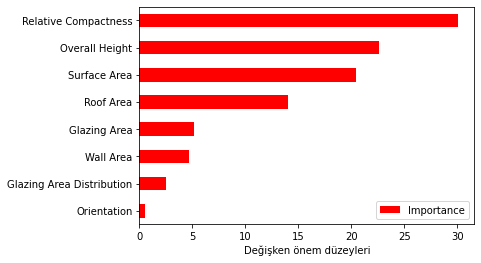

In [72]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, index=X_train.columns)

#Bu önem sırasını oluşturduk şimdi grafik ile görselleştirelim.

grafik = importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişken önem düzeyleri")
plt.show()

#### Buraya ek olarak birde random forests için değişken önem düzeyleri sıralamasını bırakıyorum.Yani bu değişkenler üzerine yoğunlaşılabilir ve sonuç daha iyi bir dayanak oluşturulur.